# **Импорт данных**

**Список посещаемости за январь месяц** <br>
*Реальные имена* **заменены**, однако остальные данные реальные 

In [2]:
import pandas as pd
df_attendance = pd.read_csv('Январь.csv', ';', names = ['Group', 'Id', 'Name', 'Date', 'In', 'Out', 'Work_time'])
df_attendance = df_attendance[2:len(df_attendance)]
df_attendance

,Group,Id,Name,Date,In,Out,Work_time
2,Аббас,74,Работник 1,2022-01-01,NaN,NaN,NaN
3,Аббас,74,Работник 1,2022-01-02,NaN,NaN,NaN
4,Аббас,74,Работник 1,2022-01-03,NaN,NaN,NaN
5,Аббас,74,Работник 1,2022-01-04,NaN,NaN,NaN
6,Аббас,74,Работник 1,2022-01-05,08:25:23,NaN,NaN
...,...,...,...,...,...,...,...
10635,Электрики,128,Работник 359,2022-01-25,NaN,NaN,NaN
10636,Электрики,128,Работник 359,2022-01-26,NaN,NaN,NaN
10637,Электрики,128,Работник 359,2022-01-27,NaN,NaN,NaN
10638,Электрики,128,Работник 359,2022-01-28,NaN,NaN,NaN


**Стоимость дня работы человека в каждой из бригад** <br>
*Вымышленные данные*

In [5]:
df_salary = pd.read_csv('Salary.csv', ";", names = ['Group', 'Cost'])
df_salary = df_salary[1:len(df_salary)]
df_salary.reset_index(drop=True, inplace=True)
df_salary

,Group,Cost
0,Аббас,3200
1,Бородинов,3500
2,Каменщики (НС),3500
3,Подсобники Вахламов,2650
4,Разнорабочие,2500
5,Салим,3200
6,Электрики,3300


# **Общий расчет смен и выплат по работникам**

In [6]:
df_payment = df_attendance[df_attendance['Work_time'] >= '04:00:00'] ## t>4 часов - 1 смена
lenght = len(df_payment)
A = [1 for i in range(lenght)]
df_payment.insert(7, 'count', A)
x = df_payment

df_half = df_attendance[df_attendance['Work_time'] < '04:00:00'] ## t<4 часов - 0.5 смены
lenght = len(df_half)
A = [0.5 for i in range(lenght)]
df_half.insert(7, 'count', A)

df_payment = df_payment.append(df_half) # Объединяем, группируем, суммируем 
df_payment = df_payment.groupby(['Group','Name']).sum()
df_payment.reset_index(drop=False, inplace=True)

df_payment = df_payment.merge(df_salary, left_on='Group', right_on='Group', how='left') # Считаем ФОТ
df_payment['Sum'] = df_payment['count'] * df_payment['Cost'].astype(float)
df_payment = df_payment.drop(['Cost'], axis = 1)
df_payment

,Group,Name,count,Sum
0,Аббас,Работник 1,12.5,40000.0
1,Аббас,Работник 10,19.0,60800.0
2,Аббас,Работник 11,18.0,57600.0
3,Аббас,Работник 12,17.0,54400.0
4,Аббас,Работник 13,18.0,57600.0
...,...,...,...,...
174,Салим,Работник 351,21.0,67200.0
175,Салим,Работник 352,28.0,89600.0
176,Салим,Работник 354,27.0,86400.0
177,Салим,Работник 355,27.0,86400.0


**"Ложные" смены**

In [7]:
df_smalltime = df_attendance[df_attendance['Work_time'] <= '01:00:00']
df_smalltime

,Group,Id,Name,Date,In,Out,Work_time
13,Аббас,74,Работник 1,2022-01-12,19:02:44,19:03:23,00:00:39
540,Аббас,442,Работник 19,2022-01-12,19:03:05,19:03:40,00:00:35
979,Аббас,456,Работник 33,2022-01-17,19:02:12,19:02:29,00:00:17
2980,Бородинов,133,Работник 98,2022-01-03,21:36:26,21:36:29,00:00:03
2986,Бородинов,133,Работник 98,2022-01-09,05:32:57,05:33:01,00:00:04
2987,Бородинов,133,Работник 98,2022-01-10,21:02:13,21:02:16,00:00:03
2990,Бородинов,133,Работник 98,2022-01-13,05:30:19,05:30:22,00:00:03
2991,Бородинов,133,Работник 98,2022-01-14,21:24:05,21:24:08,00:00:03
2993,Бородинов,133,Работник 98,2022-01-16,05:36:22,05:36:25,00:00:03
2994,Бородинов,133,Работник 98,2022-01-17,21:30:16,21:30:20,00:00:04


**Получаем обновленный ФОТ без "ложных" смен**

In [8]:
df_half_new = df_half.drop(['count'], axis = 1) # Приводим к общему виду и убираем значения из df_smalltime 
df_half_new = pd.concat([df_half_new, df_smalltime]).drop_duplicates(keep=False)

df_payment_new = x.append(df_half_new) # Объединяем, группируем, суммируем
df_payment_new = df_payment_new.groupby(['Group','Name']).sum()
df_payment_new.reset_index(drop=False, inplace=True)

df_payment_new = df_payment_new.merge(df_salary, left_on='Group', right_on='Group', how='left') # Считаем обновленный ФОТ
df_payment_new['Sum'] = df_payment_new['count'] * df_payment_new['Cost'].astype(float)
df_payment_new = df_payment_new.drop(['Cost'], axis = 1)
df_payment_new

,Group,Name,count,Sum
0,Аббас,Работник 1,12.0,38400.0
1,Аббас,Работник 10,19.0,60800.0
2,Аббас,Работник 11,18.0,57600.0
3,Аббас,Работник 12,17.0,54400.0
4,Аббас,Работник 13,18.0,57600.0
...,...,...,...,...
173,Салим,Работник 347,28.0,89600.0
174,Салим,Работник 351,21.0,67200.0
175,Салим,Работник 352,28.0,89600.0
176,Салим,Работник 354,27.0,86400.0


**Сумма к оплате**

In [9]:
FOT = df_payment['Sum'].sum()
FOT_new = df_payment_new['Sum'].sum()
print(FOT, FOT_new, FOT - FOT_new)

11907175.0 11862800.0 44375.0


*Оплата по ФОТ с "ложными" сменами = 11 907 175 Руб.* <br>
*Оплата по ФОТ без "ложных" смен = 11 862 800 Руб.* <br>
*Разница = 44 375 Руб.*

# **Общий расчет смен и выплат по бригадам**

In [10]:
df_brigade = df_payment_new.groupby('Group').sum()
df_brigade.reset_index(drop=False, inplace=True)
df_brigade['%'] = round((df_brigade['Sum'] / FOT_new) * 100,2)
df_brigade = df_brigade.sort_values('%', ascending= True)
df_brigade

,Group,count,Sum,%
2,Подсобники Вахламов,12.0,31800.0,0.27
3,Разнорабочие,25.0,62500.0,0.53
0,Аббас,551.0,1763200.0,14.86
1,Бородинов,1415.0,4952500.0,41.75
4,Салим,1579.0,5052800.0,42.59


## **Инфографика**

In [12]:
count_of_people = df_payment_new.groupby('Group').count()
count_of_people.reset_index(drop=False, inplace=True)
count_of_people['Sum'] = count_of_people['Name'].sum()
count_of_people['%'] = round((count_of_people['Name'] / count_of_people['Sum'])*100,2)
count_of_people = count_of_people.drop('count', axis = 1)
count_of_people = count_of_people.sort_values('%', ascending= True) 

payment_person =  df_payment_new.sort_values(['Sum'], ascending= False)
payment_person = payment_person[0:10]
payment_person = payment_person.sort_values('Sum', ascending= True) 

work_time =  df_payment_new.sort_values(['count'], ascending= False)
work_time = work_time[0:10]
work_time = work_time.sort_values('count', ascending= True)

work_time_ =  df_payment_new.sort_values(['count'], ascending= False)
work_time_ = work_time_[-10:len(work_time_)]
work_time_ = work_time_.sort_values('count', ascending= True) 

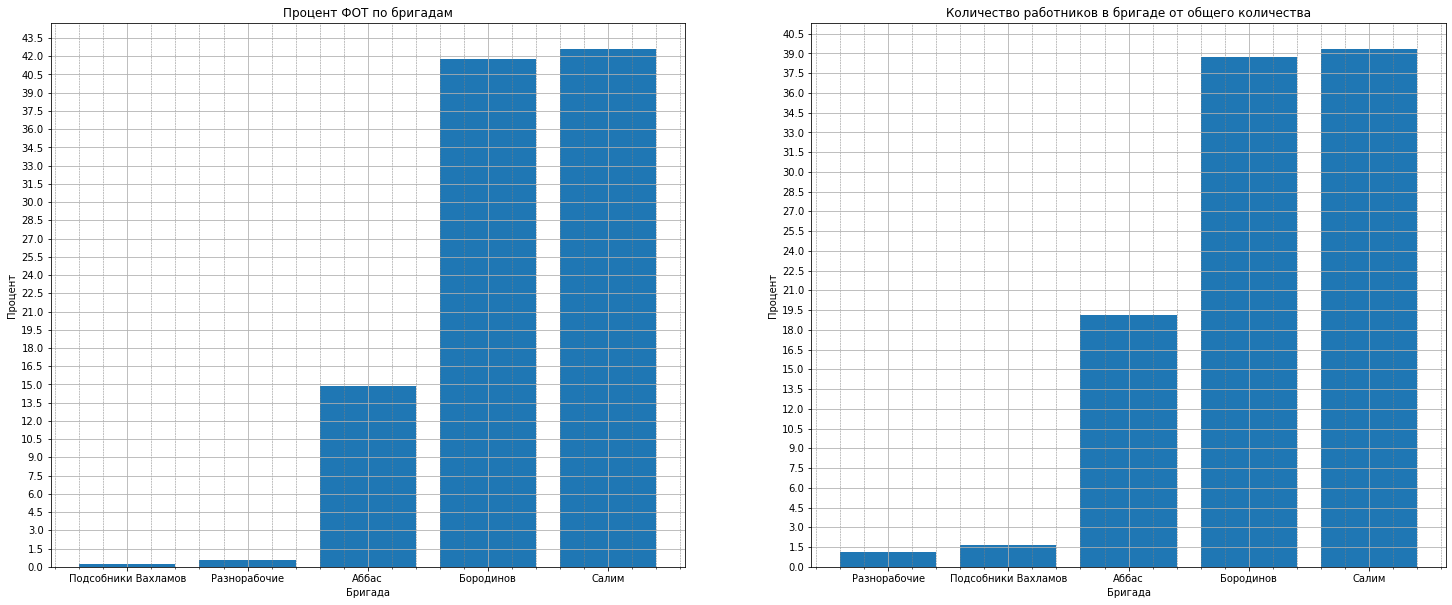

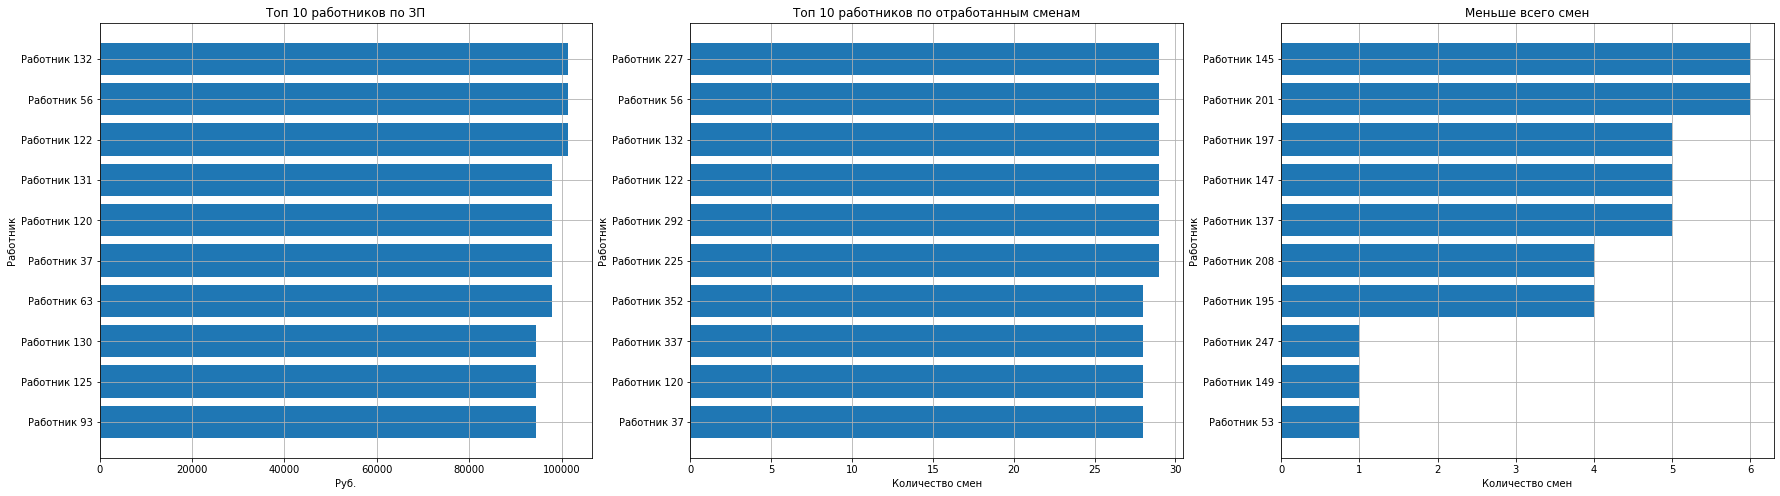

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np

fig = plt.figure(figsize=[25, 10])
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.set(title = "Процент ФОТ по бригадам", ylabel = 'Процент', xlabel='Бригада', xticks= np.arange(0,5,1), yticks=np.arange(0,46,1.5))
ax_1.grid() 
ax_2.set(title = "Количество работников в бригаде от общего количества", ylabel = 'Процент', xlabel='Бригада', xticks= np.arange(0,5,1), yticks = np.arange(0,46,1.5))
ax_2.grid() 
ax_1.bar(df_brigade['Group'], df_brigade['%'])
ax_2.bar(count_of_people['Group'], count_of_people['%'])
ax_1.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax_1.xaxis.set_minor_locator(AutoMinorLocator())
ax_2.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax_2.xaxis.set_minor_locator(AutoMinorLocator())
plt.show()

fig = plt.figure(figsize=[30, 8])
ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = "Топ 10 работников по ЗП", yticks=np.arange(0,10,1), ylabel = 'Работник', xlabel='Руб.')
ax_1.grid() 

ax_2.set(title = "Топ 10 работников по отработанным сменам", yticks=np.arange(0,10,1), ylabel = 'Работник', xlabel='Количество смен')
ax_2.grid()

ax_3.set(title = "Меньше всего смен", yticks=np.arange(0,10,1), ylabel = 'Работник', xlabel='Количество смен')
ax_3.grid()

ax_1.barh(payment_person['Name'], payment_person['Sum'])
ax_2.barh(work_time['Name'], work_time['count'])
ax_3.barh(work_time_['Name'], work_time_['count'])

plt.show()